## Observations and Insights

* Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

* Observation 1: On average, Mice treated with Capolmulin and Ramicane end up with a lower final tumor volume than mice treated with Infubinol and Ceftamin. This leads us to the conclusion that Capolmulin and Ramicane are more effective in decreasing tumor volume than Infubinol and Ceftamin. That being said, the study looked at more mice treated with Capolmulin and Ramicane, than those treated with Infubinol and Ceftamin. Perhaps, if the study were to look at larger pools of data for Infubinol and Ceftamin-treated mice, the final tumor volume of mice treated with these drugs would be closer to that of mice treated with Capolmulin and Ramicane.

* Observation 2: We looked at a number of individual mice that were treated with Capolmulin: every mouse that we looked at experienced significant tumor reduction over time. Furthermore, Capolmulin's effects were felt almost immediately, with Tumor volume declining around 15-20% within just 10 timepoints.   

* Observation 3: For the mice treated with Capolmulin, a mouse's starting weight was closely correlated (0.84 correlation coefficient) to its average tumor volume over time. Heavier mice have siginificantly larger average tumor volumes.

## Dependencies and starter code

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_project = pd.merge(mouse_metadata,study_results)
mouse_project.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
Drug_Regimen = mouse_project["Drug Regimen"]
Mouse_ID = mouse_project["Mouse ID"]
Tumor_Volume = mouse_project["Tumor Volume (mm3)"]
Mouse_Project_Reduced = pd.DataFrame({"Mouse ID":Mouse_ID,"Drug Regimen": Drug_Regimen,"Tumor Volume (mm3)":Tumor_Volume})
Mouse_Project_Reduced.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,45.000000
1,k403,Ramicane,38.825898
2,k403,Ramicane,35.014271
3,k403,Ramicane,34.223992
4,k403,Ramicane,32.997729


## Summary statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean = Mouse_Project_Reduced.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
Median = Mouse_Project_Reduced.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Variance = Mouse_Project_Reduced.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
Standard_Deviation = Mouse_Project_Reduced.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = Mouse_Project_Reduced.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

Summary_Stats = pd.DataFrame({"Mean":Mean,"Median":Median,"Variance":Variance,"Standard Deviation":Standard_Deviation,"SEM":SEM})
Summary_Stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

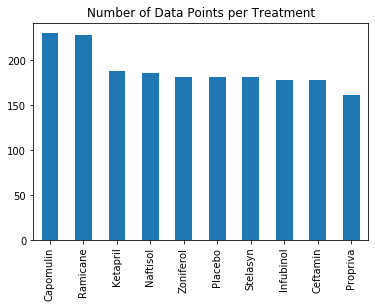

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
number_treatments = mouse_project["Drug Regimen"].value_counts()
number_treatments.plot(kind="bar",figsize = (6,4))
plt.title("Number of Data Points per Treatment")
plt.show()
plt.tight_layout

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

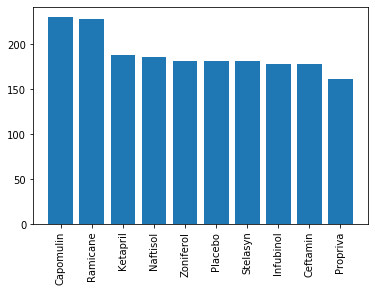

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
number_treatments_2 = mouse_project["Drug Regimen"].value_counts()
plt.bar(number_treatments_2.index.values,number_treatments_2.values)
plt.xticks(rotation=90)

## Pie plots

<function matplotlib.pyplot.show(*args, **kw)>

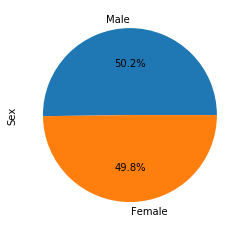

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_metadata.Sex.value_counts()
mouse_sex.plot(kind="pie",autopct="%1.1f%%")
plt.show

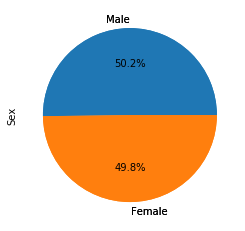

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex.values,labels=mouse_sex.index.values)
mouse_sex.plot(kind="pie",autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_four = mouse_project.groupby(["Mouse ID"]).max()
top_four = top_four.reset_index()
merged_data = top_four[["Mouse ID","Timepoint"]].merge(mouse_project,on=["Mouse ID","Timepoint"],how="left")

Drug_One = merged_data.loc[merged_data["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
Drug_Two = merged_data.loc[merged_data["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
Drug_Three = merged_data.loc[merged_data["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
Drug_Four = merged_data.loc[merged_data["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]


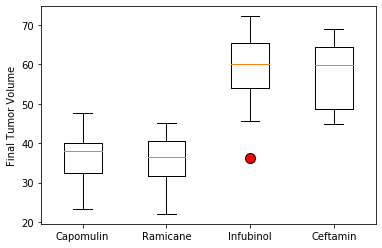

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
color = dict(markerfacecolor = "red",markersize = 10)
plt.boxplot([Drug_One,Drug_Two,Drug_Three,Drug_Four],labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=color)
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and scatter plots

Text(0.5, 1.0, 'Tumor Volume for Mouse S185 Treated with Capomulin')

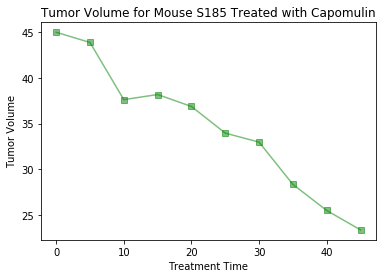

In [46]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_filter = mouse_project["Drug Regimen"]=="Capomulin"
choice = mouse_project[capomulin_filter]

filter_b = choice["Mouse ID"]=="s185"
choice_b = choice[filter_b]

x_axis = choice_b["Timepoint"] 
tumor_volume_mouse = choice_b["Tumor Volume (mm3)"]

line = plt.plot(x_axis, tumor_volume_mouse, marker="s", color = "green", alpha= 0.5,)
plt.xlabel("Treatment Time")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume for Mouse S185 Treated with Capomulin")

Text(0.5, 1.0, 'Tumor Volume for Mouse X401 Treated with Capomulin')

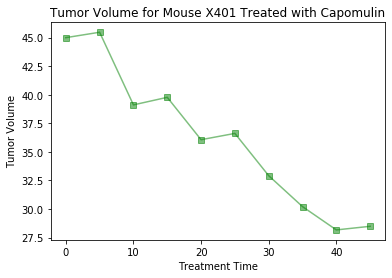

In [47]:
capomulin_filter = mouse_project["Drug Regimen"]=="Capomulin"
choice = mouse_project[capomulin_filter]

filter_b = choice["Mouse ID"]=="x401"
choice_b = choice[filter_b]

x_axis = choice_b["Timepoint"] 
tumor_volume_mouse = choice_b["Tumor Volume (mm3)"]

line = plt.plot(x_axis, tumor_volume_mouse, marker="s", color = "green", alpha= 0.5,)
plt.xlabel("Treatment Time")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume for Mouse X401 Treated with Capomulin")

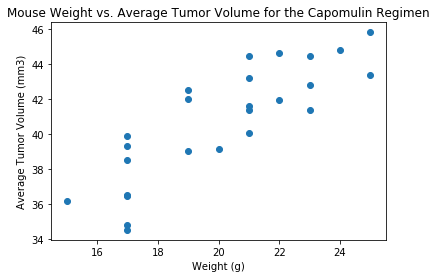

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_only = mouse_project.loc[mouse_project['Drug Regimen']=="Capomulin"]
capomulin_mice_average = capomulin_only.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_mice_average["Weight (g)"],capomulin_mice_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen")
plt.show()

The correlation coefficient between both factors is 0.84


Text(0.5, 1.0, 'Correlation between Mouse Weight and Average Tumor Volume')

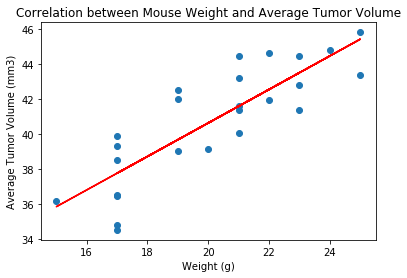

In [41]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_mice_average["Weight (g)"],capomulin_mice_average["Tumor Volume (mm3)"])
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")
model = st.linregress(capomulin_mice_average['Weight (g)'],capomulin_mice_average['Tumor Volume (mm3)'])
y_values = capomulin_mice_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_mice_average['Weight (g)'],capomulin_mice_average['Tumor Volume (mm3)'])
plt.plot(capomulin_mice_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Correlation between Mouse Weight and Average Tumor Volume')